# Metabolic Syndrome
Ashley Heinrich

## Import and Load Data

In [3]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatplotLib
import matplotlib.pyplot as plt
## Seaborn
import seaborn as sns
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as smote_pipe
## Classification Metrics
from sklearn.metrics import (ConfusionMatrixDisplay,
                             confusion_matrix, 
                             PrecisionRecallDisplay, 
                             f1_score, accuracy_score, classification_report)

filename=('https://docs.google.com/spreadsheets/d/e/2PACX-1vRZCC3KLSaYXzE69EA2IYa6udd-0VbkqlhrT08i0OUD1JX8sU5uIG4IVG5wlvQ8SZnfyKz3FnTuGcux/pub?output=csv')
df = pd.read_csv(filename)
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


## Exploring and Cleaning Data

In [4]:
df.info()
# Has 2401 rows and 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   object 
dtypes: float64(5), int64(6), object(4)
memory usage: 281.5+ KB


In [5]:
df.nunique()
# Dropping seqn column/high cardinality

seqn                 2401
Age                    61
Sex                     2
Marital                 5
Income                 14
Race                    6
WaistCirc             635
BMI                   322
Albuminuria             3
UrAlbCr              1383
UricAcid               88
BloodGlucose          187
HDL                    93
Triglycerides         345
MetabolicSyndrome       2
dtype: int64

In [6]:
df['seqn'].value_counts()

62161    1
68696    1
68702    1
68703    1
68706    1
        ..
65410    1
65412    1
65416    1
65421    1
71915    1
Name: seqn, Length: 2401, dtype: int64

In [7]:
df = df.drop(['seqn'], axis=1)
df.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [8]:
df.isna().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [9]:
df.isna().sum() / len(df)*100
# % of missing data present
# Will impute post split

Age                  0.000000
Sex                  0.000000
Marital              8.663057
Income               4.872970
Race                 0.000000
WaistCirc            3.540192
BMI                  1.082882
Albuminuria          0.000000
UrAlbCr              0.000000
UricAcid             0.000000
BloodGlucose         0.000000
HDL                  0.000000
Triglycerides        0.000000
MetabolicSyndrome    0.000000
dtype: float64

In [10]:
# No duplicates
df.duplicated().sum()

0

In [11]:
df.describe(include = 'number')

,Age,Income,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides
count,2401.000000,2284.000000,2316.000000,2375.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000
mean,48.691795,4005.253940,98.307254,28.702189,0.154102,43.626131,5.489046,108.247813,53.369429,128.125364
std,17.632852,2954.032186,16.252634,6.662242,0.422780,258.272829,1.439358,34.820657,15.185537,95.322477
min,20.000000,300.000000,56.200000,13.400000,0.000000,1.400000,1.800000,39.000000,14.000000,26.000000
25%,34.000000,1600.000000,86.675000,24.000000,0.000000,4.450000,4.500000,92.000000,43.000000,75.000000
50%,48.000000,2500.000000,97.000000,27.700000,0.000000,7.070000,5.400000,99.000000,51.000000,103.000000
75%,63.000000,6200.000000,107.625000,32.100000,0.000000,13.690000,6.400000,110.000000,62.000000,150.000000
max,80.000000,9000.000000,176.000000,68.700000,2.000000,5928.000000,11.300000,382.000000,156.000000,1562.000000


**Assumptions**

Normal Value Assumptions: 
(no column metrics provided)

1)BMI: >30 falls within obesity range
     < 18 is considered underweight

2) Albuminuria: <30 mg/g is normal, > 30 could be indicative of kidney disease.

** These are ranked as  0,1,2 no information available for what this means; no true data dictionary.Could potentially be referring to how chronic kidney disease (CKD) ranks albuminuria: A1, A2, A3. See link below

3) Urine albumin to creatinine ratio(UrAlbCr)(UACR): <30mg/g is considered normal, > 500-1000 range strongly correlates to kidney disease. 

4) Uric Acid: normal range 3.5-7.2mg/dl (increased levels are an indicator for MetSyn)

5) Blood Glucose: normal is 70-100mg/dl. *Assuming this is a fasting blood sugar

6) High Density Lipoprotein (HDL): >60mg/dl (higher #'s reduce risk of Heart Disease)

7) Triglycerides - normal is <150mg/dl

8) Waist Circumference - measured in cm.

Extra Information:

- All reputable definitions of metabolic syndrome use some blend 
of the following criteria; (no definition provided for data set)

1) Insulin resistance/hyperinsulinemia or hyperglycemia
2) Increased waist circumference or waist/hip ratio
3) Dyslipidemia (increased triglycerides)
4) Dyslipidemia- secondary (decreased HDL)
5) Hypertension (elevated blood pressure)**
6) Microalbuminuria (moderately increased albuminuria)

- High blood pressure is a leading cause of chronic kidney disease, 
whose diagnosis include elevated levels of some of the values in the data set; albuminuria, UACR and uric acid levels. 
- **High blood pressure can also be a complication of kidney disease as kidneys play an important role in keeping BP in a healthy range. 
- **There is no blood pressure in the data set, but we have lab values that have connections to kidney disease where blood pressure plays an integral role.
- Both metabolic syndrome and CKD can lead to heart disease. 
- Both share many risk factors which co-occur in individuals. 


https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.
https://www.kidney.org/atoz/content/albuminuria#:~:text=A%20normal%20amount%20of%20albumin,GFR%20number%20is%20above%2060.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8678728/#:~:text=Urine%20albumin%E2%80%90to%E2%80%90creatinine%20ratio%20(UACR)%20is%20most,ranging%20around%2025%20mg%2Fg.
https://www.kidney.org/professionals/explore-your-knowledge/how-to-classify-ckd
https://www.ucsfhealth.org/en/medical-tests/uric-acid----blood-#:~:text=Normal%20Results,of%20your%20specific%20test%20results.
https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/hdl-cholesterol/art-20046388
https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/in-depth/triglycerides/art-20048186#:~:text=Borderline%20high%20%E2%80%94%20150%20to%20199,5.7%20mmol%2FL%20or%20above)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675814/

In [12]:
# Exploring higher values
high_value = df[df['UrAlbCr'] > 3000].index
high_value


Int64Index([50, 140, 910, 1557, 2070, 2196], dtype='int64')

Levels of pts with kidney disease can be over 1000. 

In [13]:
# Exploring higher value
high_tri = df[df['Triglycerides']>1000].index
high_tri
## Max is 1562 ... extremely high but not nonsensical

Int64Index([1016, 2092], dtype='int64')

In [14]:
df['Albuminuria'].value_counts()
# Ranked somehow as 0,1,2. Would be a question I would ask for more information about. 
# A possibility for how is given in link below
# https://www.kidney.org/professionals/explore-your-knowledge/how-to-classify-ckd

0    2089
1     254
2      58
Name: Albuminuria, dtype: int64

In [15]:
# Looking for Inconsistencies in object type columns
dtypes = df.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['Sex', 'Marital', 'Race', 'MetabolicSyndrome'], dtype='object')

In [16]:
for col in str_cols:
    print(f"- Column= {col}")
    print(df[col].value_counts(dropna=False))
    print('\n\n')

- Column= Sex
Female    1211
Male      1190
Name: Sex, dtype: int64



- Column= Marital
Married      1192
Single        498
Divorced      242
NaN           208
Widowed       166
Separated      95
Name: Marital, dtype: int64



- Column= Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: Race, dtype: int64



- Column= MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: MetabolicSyndrome, dtype: int64





 


1.   Target is imbalanced
2.   Other columns are appropriate with consistent values



## Univariate Visualizations

In [17]:
sns.set_palette('pastel')

**Target Countplot**

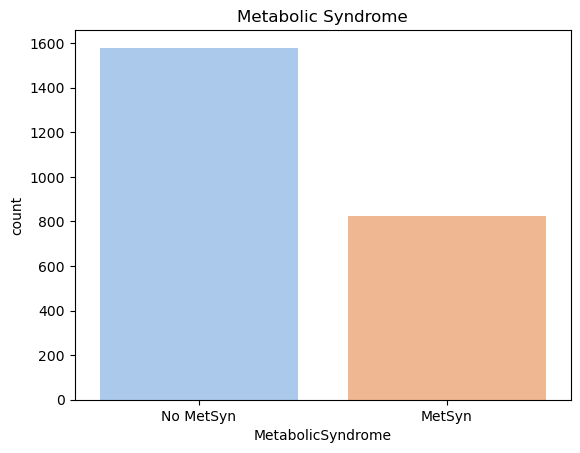

In [18]:
sns.countplot(data=df, x='MetabolicSyndrome');
plt.title('Metabolic Syndrome');

* More patients without metabolic syndrome than with in dataset (Target). 

**Age Distribution and Boxplot**




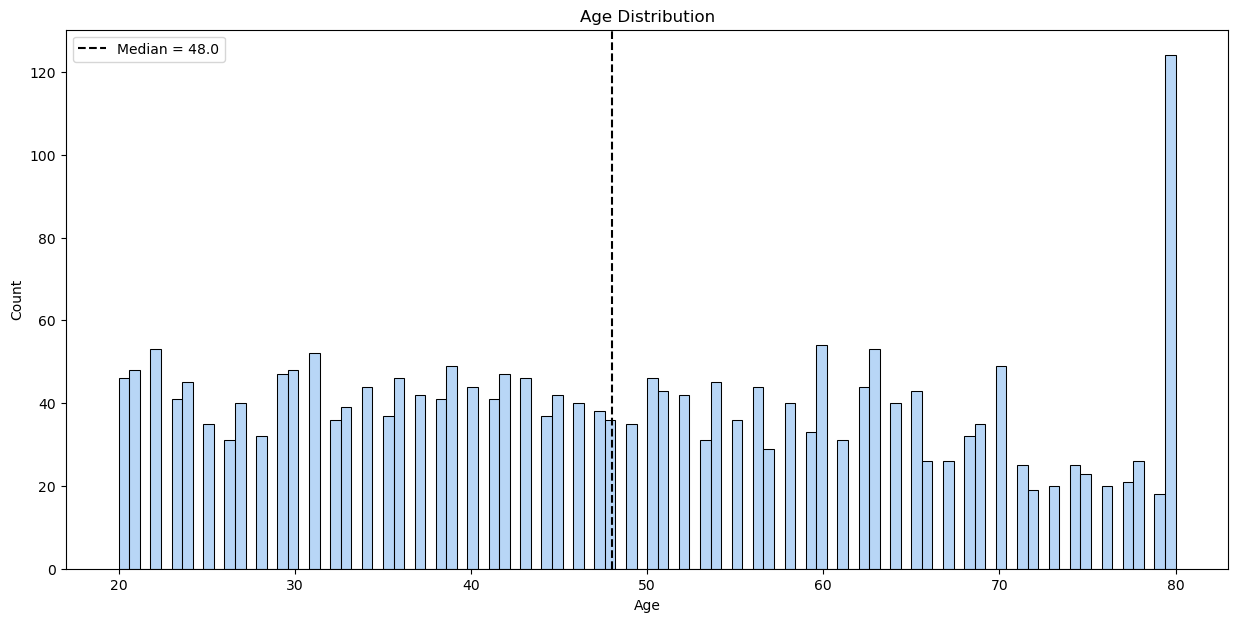

In [19]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'Age', bins=100);


ax.set(title = 'Age Distribution', xlabel = 'Age')

median = df['Age'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Wide variety of ages represented from all age groups. 
* Many pts right around 80 yrs old. 
* Median age of 48yrs old. 

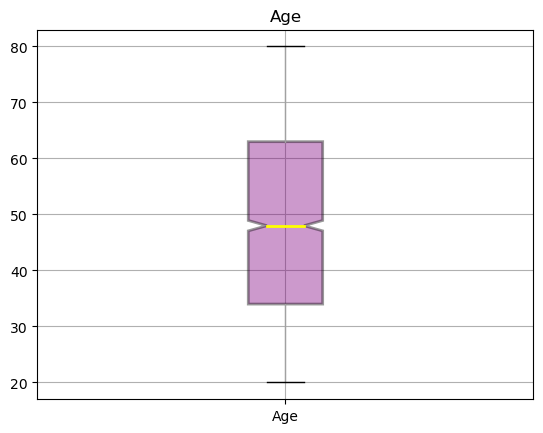

In [20]:
df.boxplot(column = ['Age'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
           
plt.title('Age');

* No outliers present

**Sex Countplot**

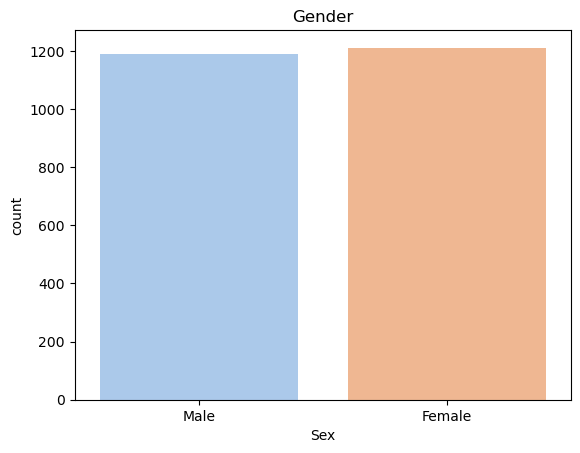

In [21]:
sns.countplot(data=df, x='Sex');
plt.title('Gender');

* Almost equal amounts of male/females represented in data


**Marital Status Countplot**

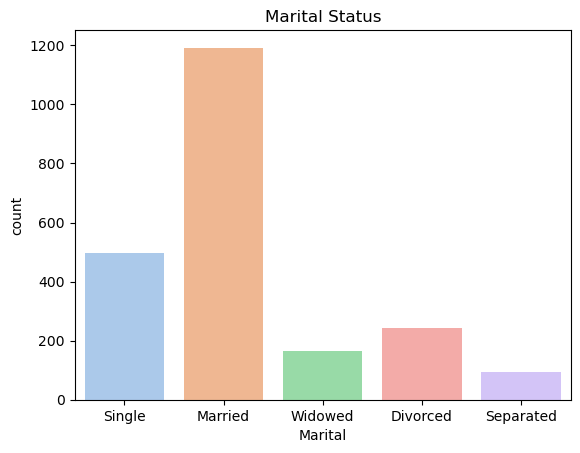

In [22]:
sns.countplot(data=df, x='Marital');
plt.title('Marital Status');

* Most patients in data set are married. 
* Next most common status is single 

**Income Boxplot**

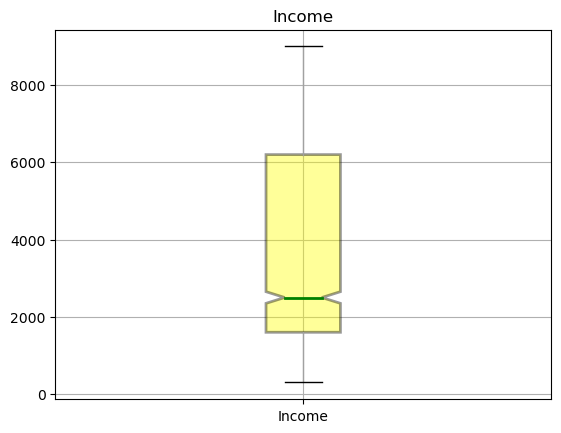

In [23]:
df.boxplot(column = ['Income'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='green'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'yellow', alpha = .4));
           
plt.title('Income');

* No outliers present

**Race Countplot**

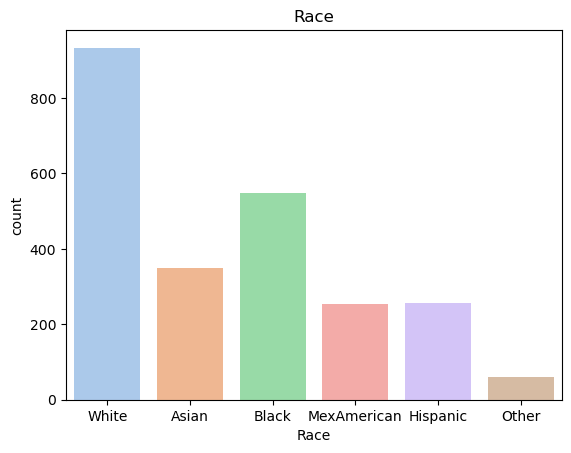

In [24]:
sns.countplot(data=df, x='Race');
plt.title('Race');

* White has the highest amount of patients represented, followed by Black

**Waist Circumference**

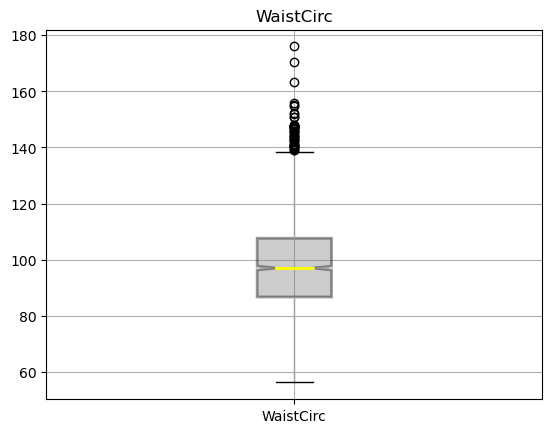

In [25]:
df.boxplot(column = ['WaistCirc'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'gray', alpha = .4));
           
plt.title('WaistCirc');

* Many outliers present above maximum. 

**BMI Distribution and Boxplot**

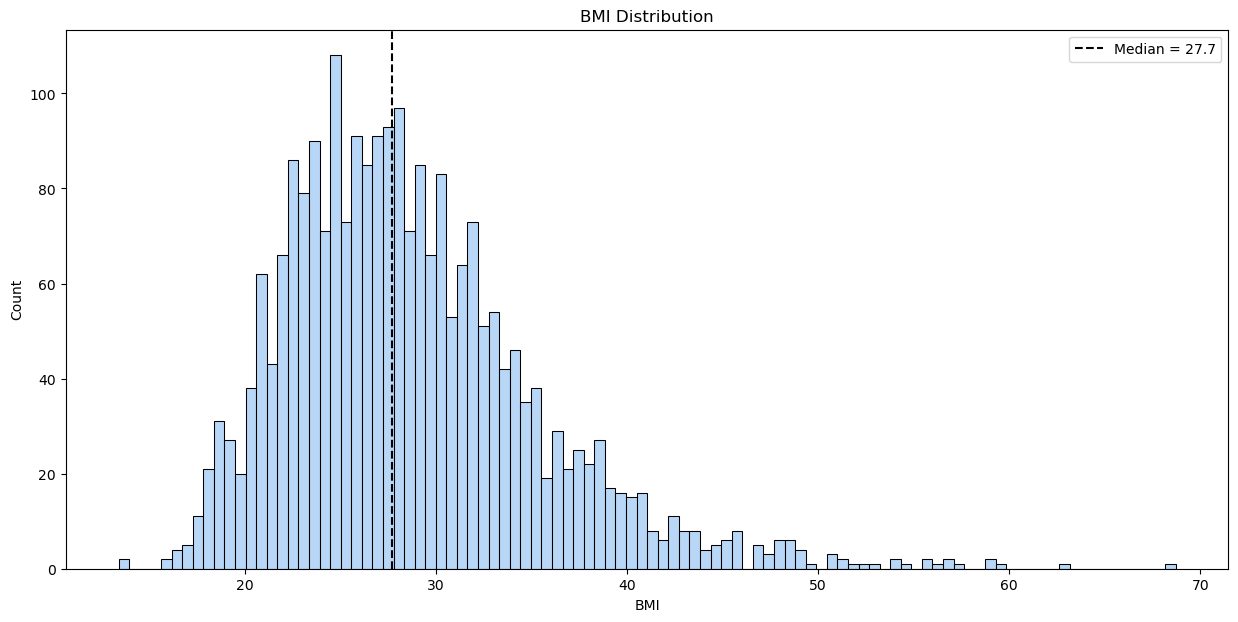

In [26]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'BMI', bins=100);


ax.set(title = 'BMI Distribution', xlabel = 'BMI')

median = df['BMI'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Slightly right skewed with most data occuring around the median

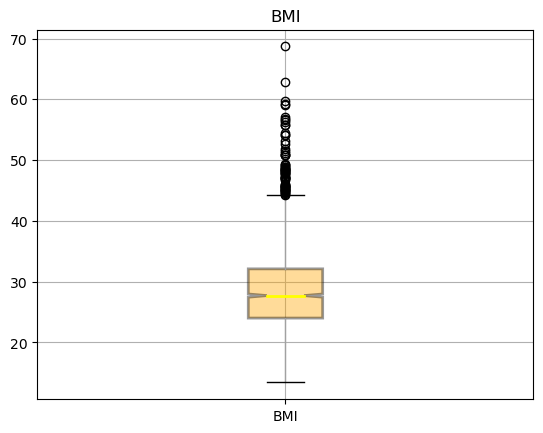

In [27]:
df.boxplot(column = ['BMI'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'orange', alpha = .4));
           
plt.title('BMI');

* Many outliers present above the maximum

**Albuminuria Countplot**

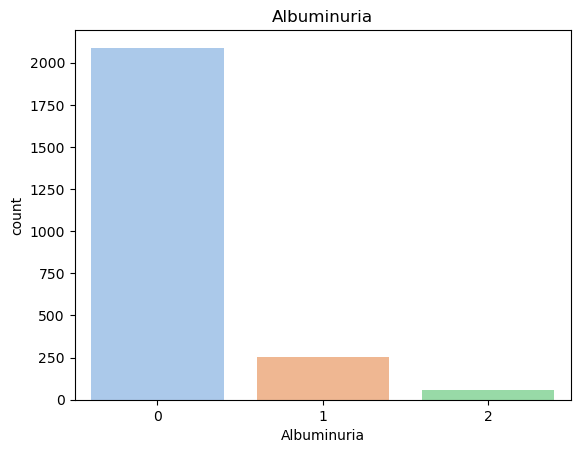

In [28]:
sns.countplot(data=df, x='Albuminuria');
plt.title('Albuminuria');

* Most values fall in the '0' category. 
* No data dictionary so there unfortunately isn't a reference point to give meaning to this order. 

**Urine Albumin to Creatinine Ratio**

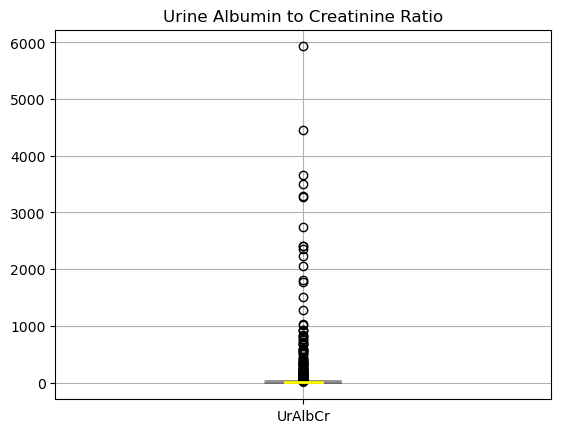

In [29]:
df.boxplot(column = ['UrAlbCr'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'purple', alpha = .4));
        
plt.title('Urine Albumin to Creatinine Ratio');

* Box is being compressed as a result of extreme outliers being accomodated by the scaling. 
* Many outliers above the maximum

In [30]:
df['UrAlbCr'].describe()

count    2401.000000
mean       43.626131
std       258.272829
min         1.400000
25%         4.450000
50%         7.070000
75%        13.690000
max      5928.000000
Name: UrAlbCr, dtype: float64

**Uric Acid**

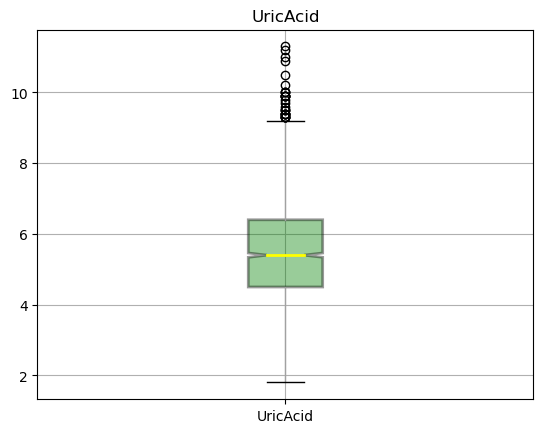

In [31]:
df.boxplot(column = ['UricAcid'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
        
plt.title('UricAcid');

* Outliers present above the maximum 

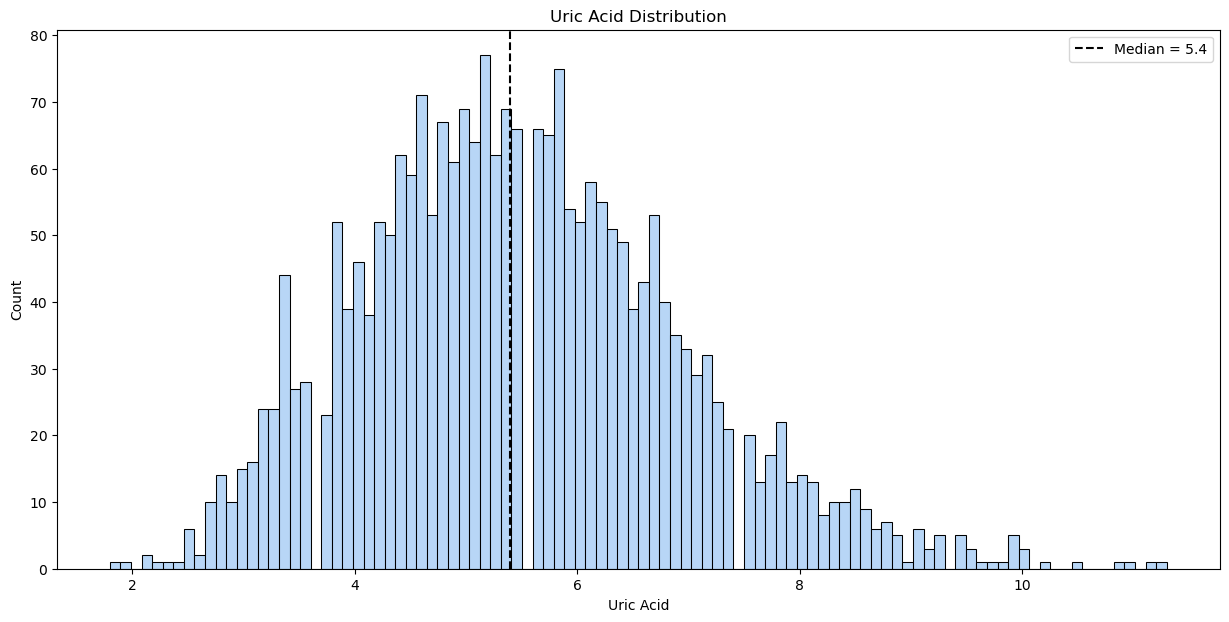

In [32]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'UricAcid', bins=100);


ax.set(title = 'Uric Acid Distribution', xlabel = 'Uric Acid')

median = df['UricAcid'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Fairly well distributed with some values having no representation in dataset. 
* Most of the data occurs around the median

**Blood Glucose**

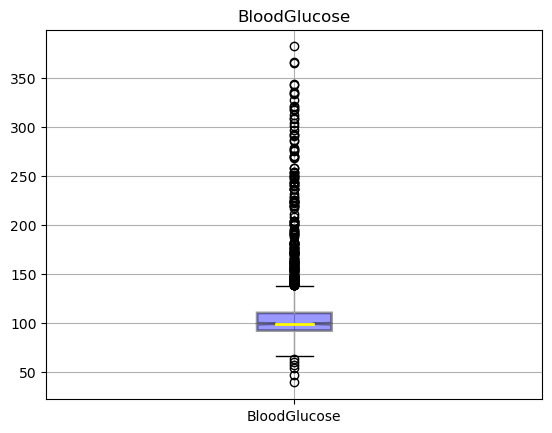

In [33]:
df.boxplot(column = ['BloodGlucose'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4));
        
plt.title('BloodGlucose');

* Box being compressed to accomodate many outliers both above the maximum and below the minimum. 

In [34]:
df['BloodGlucose'].describe()

count    2401.000000
mean      108.247813
std        34.820657
min        39.000000
25%        92.000000
50%        99.000000
75%       110.000000
max       382.000000
Name: BloodGlucose, dtype: float64

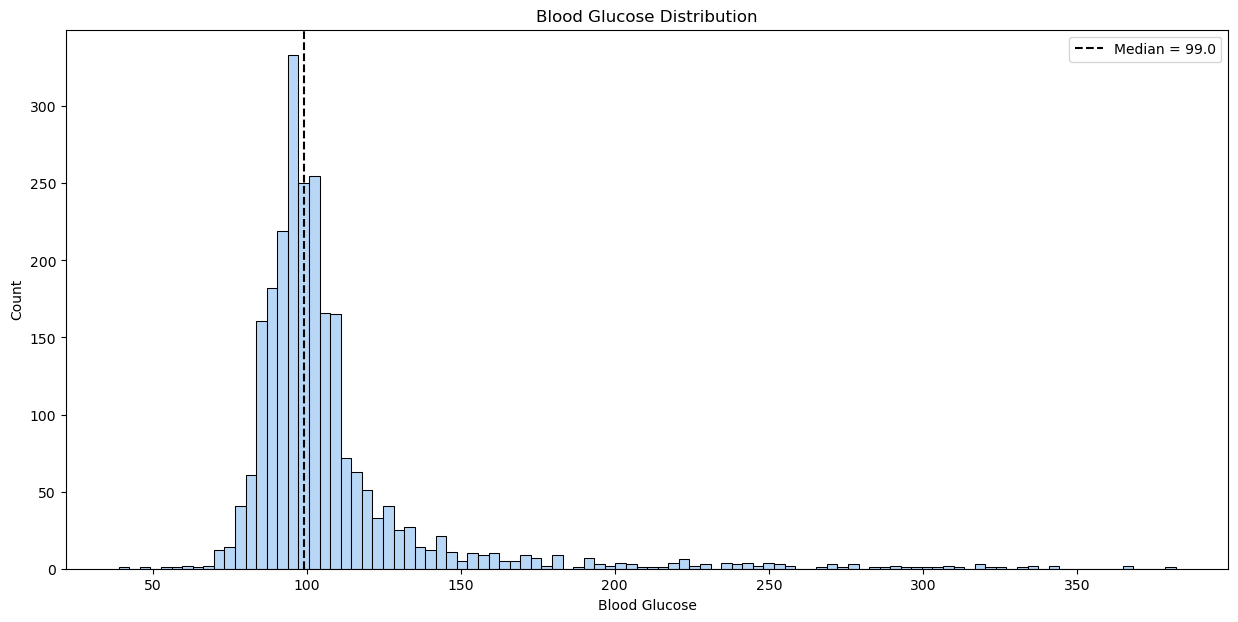

In [35]:
plt.figure(figsize = (15,7))
ax = sns.histplot(data = df, x = 'BloodGlucose', bins=100);


ax.set(title = 'Blood Glucose Distribution', xlabel = 'Blood Glucose')

median = df['BloodGlucose'].median()

ax.axvline(median, color = 'black', ls = '--',
           label = f'Median = {median}')

ax.legend();

* Right skewed with most values occuring around the median (99)

**HDL Cholesterol**

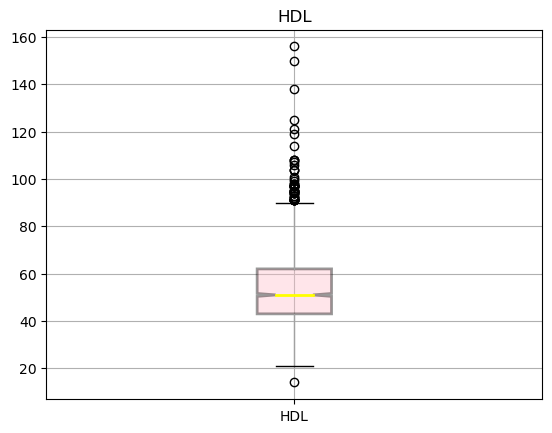

In [36]:
df.boxplot(column = ['HDL'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'pink', alpha = .4));
        
plt.title('HDL');

* Many outliers above the maximum. 
* Outlier noted below the minimum 

**Triglycerides**

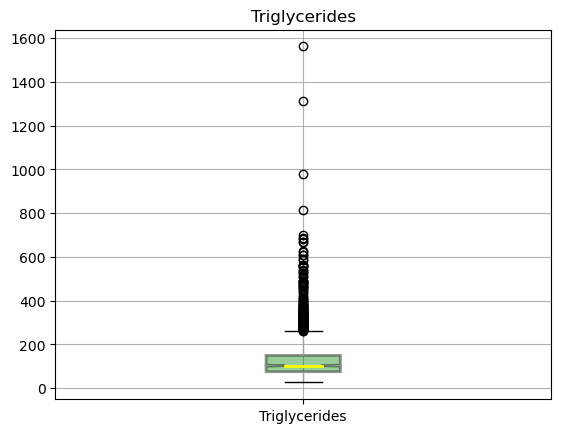

In [37]:
df.boxplot(column = ['Triglycerides'], 
           notch = True, patch_artist = True, 
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4));
        
plt.title('Triglycerides');

* Box is being compressed as a result of extreme outliers being accomodated by the scaling. 
* Many outliers above the maximum

In [38]:
df['Triglycerides'].describe()

count    2401.000000
mean      128.125364
std        95.322477
min        26.000000
25%        75.000000
50%       103.000000
75%       150.000000
max      1562.000000
Name: Triglycerides, dtype: float64

**Heatmap**

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_12835/3602615960.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


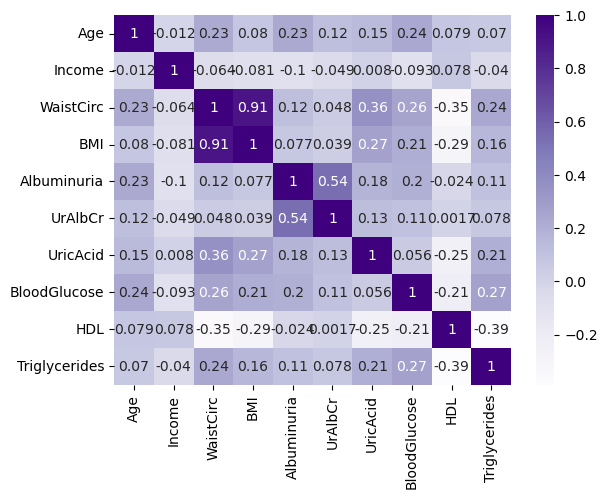

In [39]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Purples', annot= True);


*   Strong correlation between BMI and waist circumference
*   Minor positive correlation between Uric Acid and Waist circ
*   Minor negative correlation between Waist circ and HDL
*   Moderate correlation between UrAlbCr and Albuminuria (tests that look for the same thing)
*   Minor negative correlation between HDL and triglycerides







## Multivariate Visualizations

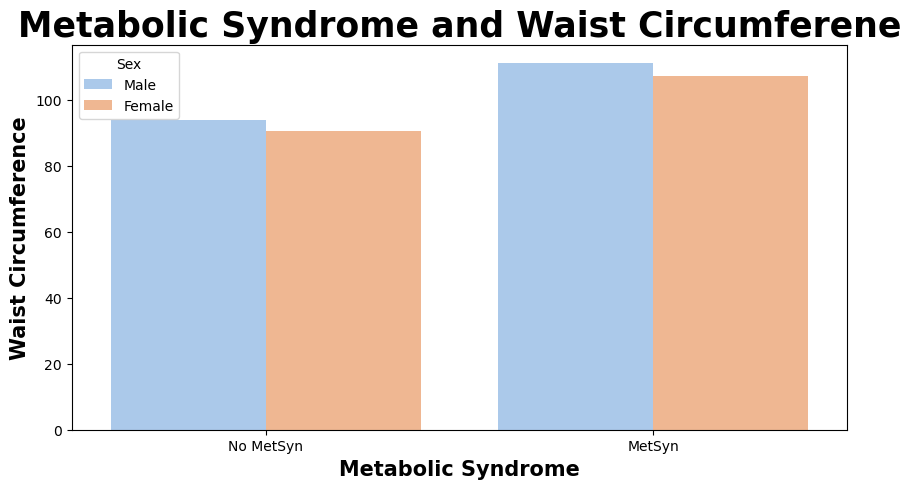

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='WaistCirc', hue = 'Sex',
                 errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Waist Circumferene', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Waist Circumference', fontsize = 15, fontweight = 'bold');

* Individuals with Metabolic Syndrome have higher waist circumferences
* Males have higher waist circumferences in both categories.  
* Waist circumference is a diagnostic criteria for Metabolic Syndrome

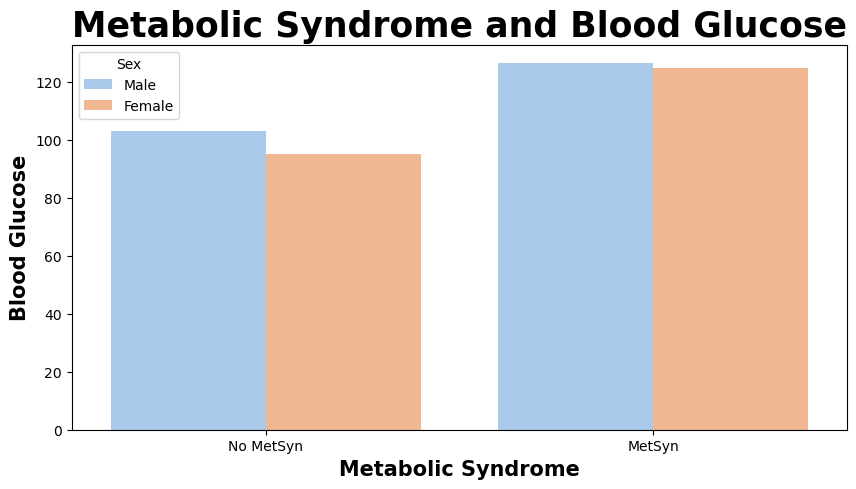

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='BloodGlucose',
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Blood Glucose', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Blood Glucose', fontsize = 15, fontweight = 'bold');

* Individuals with Metabolic Syndrome have higher blood glucose levels
* Males have higher glucose levels in both categories but are much closer to females with Metabolic Syndrome. 
* Hyperinsulinemia and hyperglcemia (high blood sugar) are a diagnostic criteria for Metabolic Syndrome. 

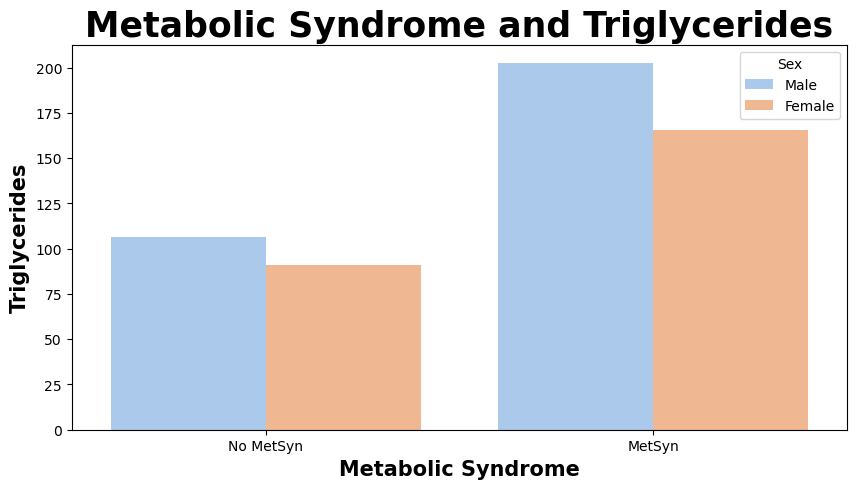

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='Triglycerides',
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Triglycerides', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Triglycerides', fontsize = 15, fontweight = 'bold');

* Individuals with Metabolic syndrome have significantly higher triglyceride levels than those without. 
* Triglycerides are significantly higher in males with metabolic syndrome than females who also have it. 
* Higher levels in males than females of those without Metabolic Syndrome. 
* Triglycerides are a type of fat that circulates in the blood. Having lower levels is desired to help prevent heart disease. High levels harden and thicken artery walls. 

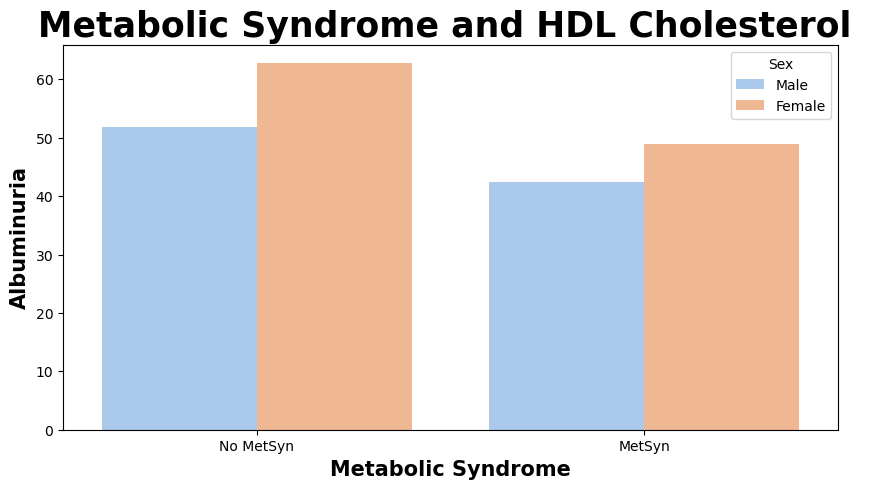

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='HDL', 
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and HDL Cholesterol ', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Albuminuria', fontsize = 15, fontweight = 'bold');

* HDL cholesterol is higher in individuals without Metabolic Syndrome. 
* Women have higher HDL levels in both categories. More significantly in those without Metabolic Syndrome
* This follows the knowledge of higher HDL levels being better for your heart as compared to lower levels. It is considered your 'good' cholesterol with LDL generally being known as the 'bad' one. Your total cholesterol comprises of both HDL and LDL. 

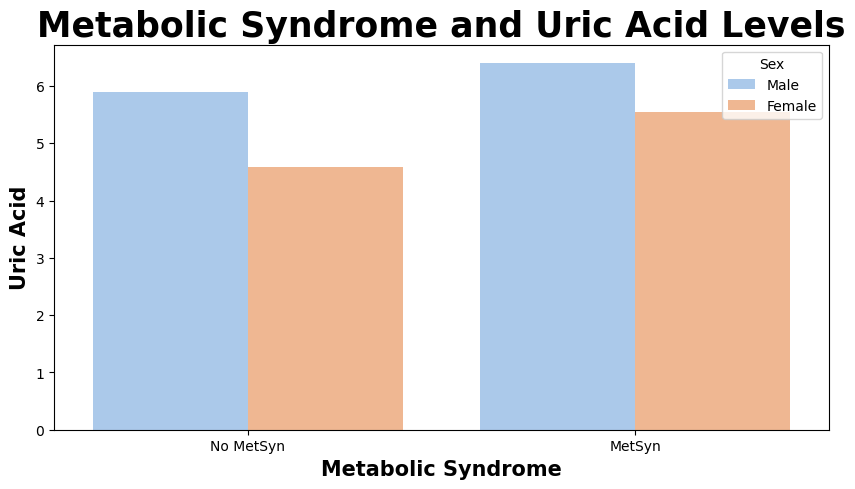

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='UricAcid', 
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Uric Acid Levels', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Uric Acid', fontsize = 15, fontweight = 'bold');

* Uric Acid levels are higher in individuals with Metabolic Syndrome than those without. 
* Males have higher uric acid levels than females in both categories. 
* Uric acid is a normal waste product that is usually excreted by the kidneys (urination). Increased blood levels are commonly seen in those with Metabolic Syndrome. It is a risk factor for hypertension, Chronic Kidney Disease among others and cardiovascular diseases. 

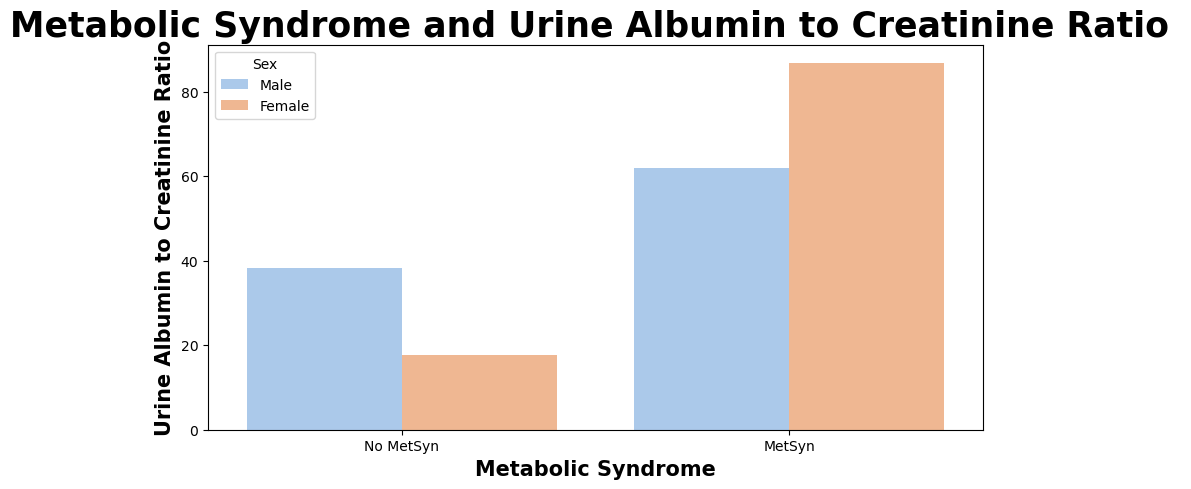

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='UrAlbCr', 
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Urine Albumin to Creatinine Ratio '
             , fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Urine Albumin to Creatinine Ratio', fontsize = 15, 
              fontweight = 'bold');

* There are significantly higher urine albumin/creatinine ratios in patients with metabolic syndrome. 
* Higher levels in females with metabolic syndrome than males. 
* Male levels are higher in those without than females. 
* This is a test to measure the albumin protein levels in urine. It is a quicker 'spot' test that does not require 24 hour collection but does correlate well with 24 hour collections. 

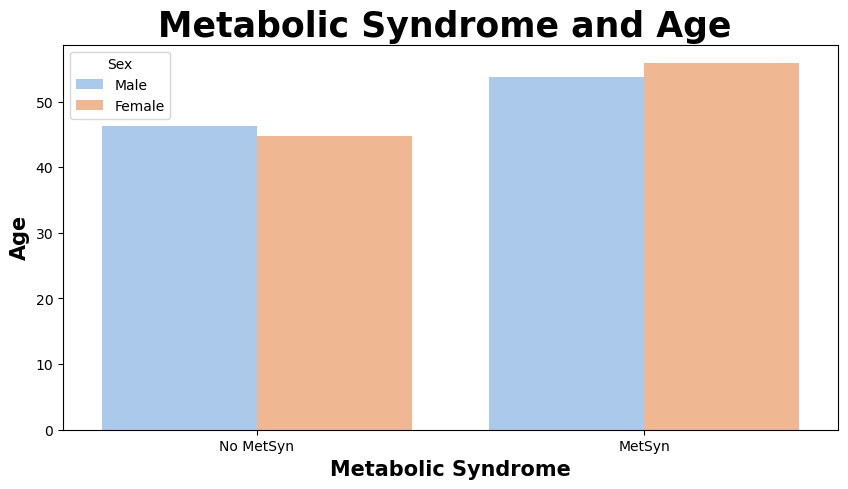

In [46]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(data=df, x='MetabolicSyndrome', y='Age',
                 hue = 'Sex', errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Metabolic Syndrome and Age ', fontsize = 25, 
             fontweight = 'bold');
ax.set_xlabel('Metabolic Syndrome', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Age', fontsize = 15, fontweight = 'bold');

* Individuals with metabolic syndrome are older than those without. 
* In this dataset, there are older females than males with metabolic syndrome. 
* In this dataset, there are older males without metabolic syndrome. 

In [47]:
sorted_df = df.groupby('Race')['Age'].mean().sort_values(ascending = False)
sorted_df

Race
White          51.108253
Hispanic       49.988327
Black          48.594891
Asian          45.197708
MexAmerican    44.723320
Other          43.590164
Name: Age, dtype: float64

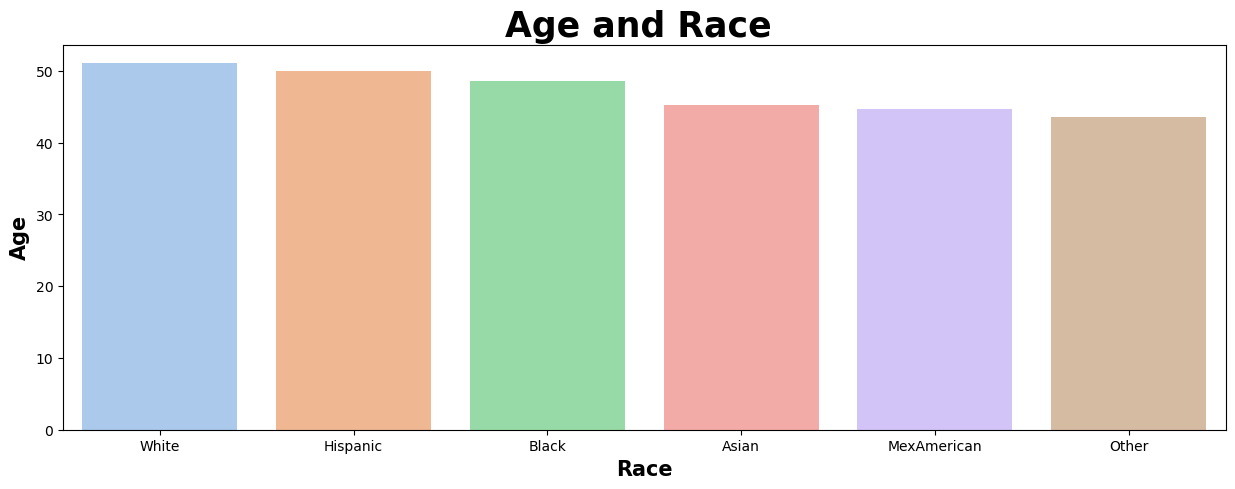

In [48]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(data=df, x='Race', y='Age', order= sorted_df.index, errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Age and Race ', fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Race', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Age', fontsize = 15, fontweight = 'bold');

* Race with the oldest individuals is White, closely followed by Hispanic. 
* Youngest is the 'Other' category. 


In [49]:
sorted_df2 = df.groupby('Marital')['Income'].mean().sort_values(ascending = False)
sorted_df2

Marital
Married      5066.579178
Single       3195.753715
Divorced     2949.557522
Widowed      2631.875000
Separated    2575.555556
Name: Income, dtype: float64

/var/folders/fp/jpcv35096h9d0ylkqvbwx2xm0000gn/T/ipykernel_12835/4218233888.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_labels);


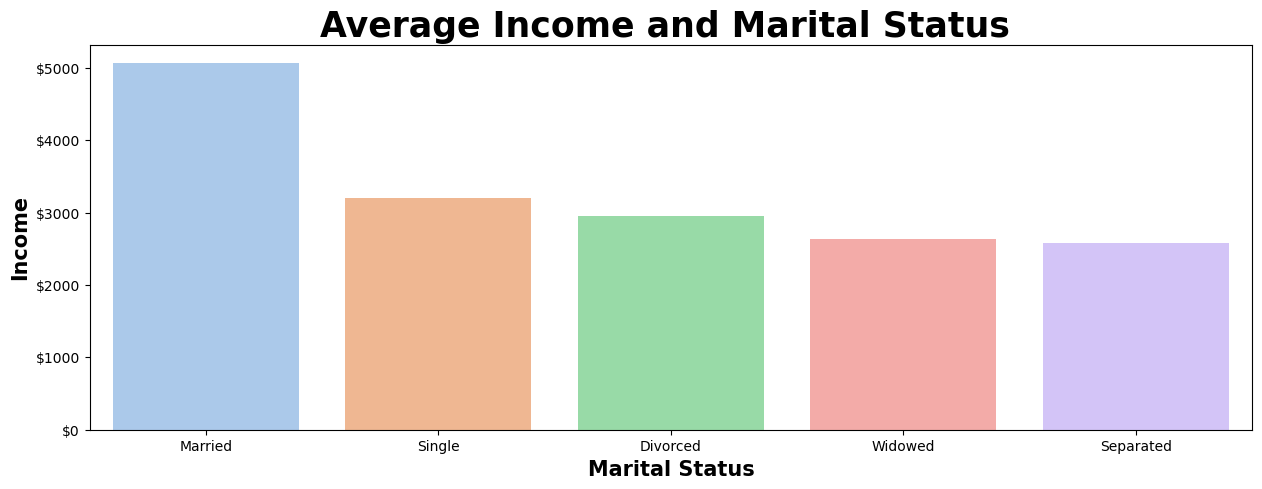

In [50]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(data=df, x='Marital', y='Income', 
                 order= sorted_df2.index, errorbar=None);
plt.yticks(fontsize = 10);
ax.set_title('Average Income and Marital Status ', 
             fontsize = 25, fontweight = 'bold');
ax.set_xlabel('Marital Status', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Income', fontsize = 15, fontweight = 'bold');


ticks = ax.get_yticks();
new_labels = ['${}'.format(int(amt)) for amt in ticks];
ax.set_yticklabels(new_labels);

* Married Individuals have significantly higher income than any other marital status. 

The two rather pertinent visuals are: 

1.   Metabolic Syndrome and Blood Glucose: It's an important trend because hyperglycemia is a non-negotiable diagnostic criteria that is required by every reputable definition of Metabolic Syndrome. It shows that people with high blood glucose levels are more likely to have metabolic syndrome. 

2.   Metabolic Syndrome and Urine Albumin to Creatinine Ratio: Given the short explanation of the lab test to provide context, you can see the stark contrast betweeen the urine levels of those with and without metabolic syndrome. It's an interesting visualization because Microalbuminuria (UrAlbCr) is not a criteria point for all reputable definitions of Metabolic Syndrome yet you can see the high frequency of this symptom in individuals with metabolic syndrome. Furthermore, assuming the stakeholders have a familiarity with Metabolic syndrome and its definition, this lab value links metabolic syndrome to both diabetes and early chronic renal disorder and shows that symptoms overlap amongst these frequently co-occuring diagnoses.  



## Preprocessing

**Creating Boolean Columns**
* Simplifying columns to help with ML
* Dropping Albuminuria column
* Features editing to simplify Age column

In [51]:
# Replacing Sex column with boolean values
df['Sex'].replace({'Female':1, 'Male':0}, inplace=True)
df.rename(columns={'Sex':'Is_Female'}, inplace=True)
df['Is_Female'].value_counts()

1    1211
0    1190
Name: Is_Female, dtype: int64

In [52]:
df['Race'].replace({'White':1, 'Black':0, 'Asian':0, 'Hispanic':0, 
                       'MexAmerican':0, 'Other':0}, inplace=True)
df.rename(columns={'Race':'Is_White'}, inplace=True)
df['Is_White'].value_counts()

0    1468
1     933
Name: Is_White, dtype: int64

In [53]:
df['Marital'].replace({'Married':1, 'Single':0, 'Divorced':0, 'Widowed':0, 
                       'Separated':0}, inplace=True)
df.rename(columns={'Marital':'Is_Married'}, inplace=True)
df['Is_Married'].value_counts()

1.0    1192
0.0    1001
Name: Is_Married, dtype: int64

In [54]:
df = df.drop(['Albuminuria'], axis=1)
df.head()

,Age,Is_Female,Is_Married,Income,Is_White,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,0,0.0,8200.0,1,81.0,23.3,3.88,4.9,92,41,84,No MetSyn
1,44,1,1.0,4500.0,1,80.1,23.2,8.55,4.5,82,28,56,No MetSyn
2,21,0,0.0,800.0,0,69.6,20.1,5.07,5.4,107,43,78,No MetSyn
3,43,1,0.0,2000.0,0,120.4,33.3,5.22,5.0,104,73,141,No MetSyn
4,51,0,1.0,NaN,0,81.1,20.1,8.13,5.0,95,43,126,No MetSyn


In [55]:
#df['Age'] = df['Age'].apply(lambda x: 'young' if x < else 'old')
# df.head()

,Age,Is_Female,Is_Married,Income,Is_White,WaistCirc,BMI,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,young,0,0.0,8200.0,1,81.0,23.3,3.88,4.9,92,41,84,No MetSyn
1,old,1,1.0,4500.0,1,80.1,23.2,8.55,4.5,82,28,56,No MetSyn
2,young,0,0.0,800.0,0,69.6,20.1,5.07,5.4,107,43,78,No MetSyn
3,old,1,0.0,2000.0,0,120.4,33.3,5.22,5.0,104,73,141,No MetSyn
4,old,0,1.0,NaN,0,81.1,20.1,8.13,5.0,95,43,126,No MetSyn


In [ ]:
df['Age'] = df['Age'].apply(lambda x: 'young' if (x > 20) & (x < 40), 
                            'adult' elif (x > 40) & (x < 60), else 'old')
df.head()

In [56]:
df['Age'].replace({'young':0, 'adult': 1, 'old':2}, inplace=True)
df['Age'].value_counts()

1    1549
0     852
Name: Is_Old, dtype: int64

**Splitting Data**

In [57]:
# Binarize Target Column

df['MetabolicSyndrome'] = df['MetabolicSyndrome'].map({'MetSyn':1, 'No MetSyn':0})
# Save X data
X = df.drop(columns = 'MetabolicSyndrome')
# Encode target
y = df['MetabolicSyndrome']

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    random_state = 42)

**Column Selectors and Transformers**

In [59]:
num_cols = ['Is_Female','Is_White', 'WaistCirc', 'BMI', 
           'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 
           'Triglycerides', 'Is_Old']
num_2cols = ['Is_Married']

num3_cols = ['Income']


In [60]:
# Imputers

freq_imputer = SimpleImputer(strategy = 'most_frequent')

median_imputer = SimpleImputer(strategy = 'median')

mean_imputer = SimpleImputer(strategy = 'mean')

# Standard Scaler

scaler = StandardScaler()

* Is_Married will be imputed with most frequent; binary column
* Income will be imputed with the mean as its numerical without outliers
* WaistCirc and BMI have many outliers and will impute with median as it's less sensitive to outliers. 

**Pipelines and Transformers**

In [61]:
num_pipeline = make_pipeline(median_imputer, scaler)
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [62]:
num_pipeline2 = make_pipeline(freq_imputer, scaler)
num_pipeline2

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [63]:
num_pipeline3 = make_pipeline(mean_imputer, scaler)
num_pipeline3

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [64]:
# Making Tuples for Transformer

num_tuple = (num_pipeline, num_cols)

num_tuple2 = (num_pipeline2, num_2cols)

num_tuple3 = (num_pipeline3, num3_cols)

# Column Transformer

preprocessor = make_column_transformer(num_tuple, num_tuple2, num_tuple3, 
                                      remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Is_Female', 'Is_White', 'WaistCirc', 'BMI',
                                  'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
                                  'Triglycerides', 'Is_Old']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Is_Married']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Income'])])

**Transform Data**

In [65]:
# Fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Is_Female', 'Is_White', 'WaistCirc', 'BMI',
                                  'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
                                  'Triglycerides', 'Is_Old']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Is_Married']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Income'])])

In [66]:
# Tranform test and train
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [67]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (1800, 12)




array([[-1.01793865, -0.80801767, -0.160267  , ...,  0.74728947,
         0.85582418,  0.17609751],
       [-1.01793865,  1.23759669,  1.17226392, ...,  0.74728947,
        -1.16846429, -0.51481331],
       [-1.01793865, -0.80801767,  0.04331411, ..., -1.33816952,
        -1.16846429, -0.82572318],
       ...,
       [-1.01793865, -0.80801767,  0.9933593 , ...,  0.74728947,
         0.85582418,  0.7633717 ],
       [-1.01793865, -0.80801767,  0.27774085, ...,  0.74728947,
         0.85582418, -0.1693579 ],
       [ 0.98237747, -0.80801767,  0.28390997, ...,  0.74728947,
        -1.16846429, -0.51481331]])

## Random Forest Classifier

In [68]:
rf = RandomForestClassifier(random_state = 42)
rf_pipe = make_pipeline(preprocessor, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Is_Female', 'Is_White',
                                                   'WaistCirc', 'BMI',
                                                   'UrAlbCr', 'UricAcid',
                                                   'BloodGlucose', 'HDL',
                                                   'Triglycerides', 'Is_Old']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Is_Married']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [69]:
# Save predictions for train dataset
rf_train_preds = rf_pipe.predict(X_train)

# Save test predictions
rf_test_preds = rf_pipe.predict(X_test)

**Initial RF**

In [70]:
print(classification_report(y_train, rf_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



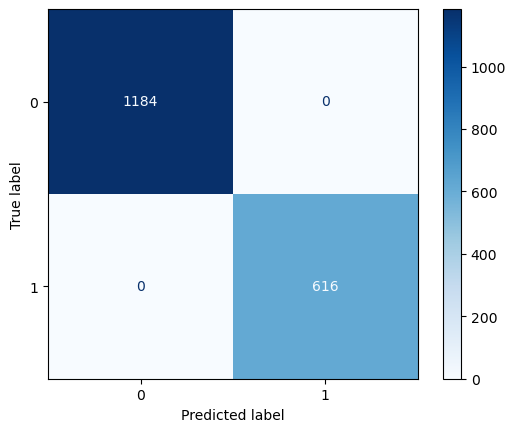

In [71]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds, 
                                        cmap='Blues');

In [72]:
print(classification_report(y_test, rf_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       395
           1       0.85      0.79      0.82       206

    accuracy                           0.88       601
   macro avg       0.87      0.86      0.86       601
weighted avg       0.88      0.88      0.88       601



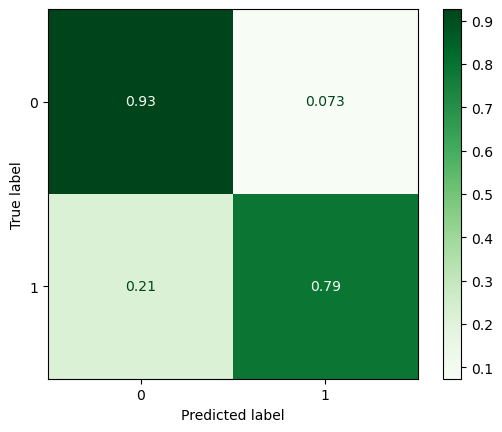

In [73]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds, 
                                        cmap='Greens', normalize ='true');

* Overfitting; perfect train and okay test 

**Tuning Random Forest**

In [74]:
# Checking max depth of tree
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max_depth = max(est_depths)
max_depth

21

In [75]:
rf_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['Is_Female', 'Is_White', 'WaistCirc', 'BMI',
                                     'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
                                     'Triglycerides', 'Is_Old']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
      

In [123]:

params = {'randomforestclassifier__max_depth':range(1,21),
          'randomforestclassifier__n_estimators': range(5,100,20),
          'randomforestclassifier__max_features': ['sqrt', 'log2']}

In [124]:
# Using GridSearch, fittinng to train
rf_grid = GridSearchCV(rf_pipe, params)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Is_Female',
                                                                          'Is_White',
                                                                          'WaistCirc',
                                                                          'BMI',
                                                                          'UrAlbCr',
                                                                          'UricAcid',
                                                                          'BloodGlucose',
                                                                          'HDL',
                                                                          'Triglycerides',
                                                                          'Is_Old']),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps...
                                                                        ('pipeline-3',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['Income'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__max_depth': range(1, 21),
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2'],
                         'randomforestclassifier__n_estimators': range(5, 100, 20)})

In [125]:
print(rf_grid.best_params_)

{'randomforestclassifier__max_depth': 11, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__n_estimators': 65}


In [126]:
rf_grid.best_score_

0.8761111111111111

In [127]:
grid_df = pd.DataFrame(rf_grid.cv_results_)

grid_df 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__max_features,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011463,0.003374,0.003040,0.000501,1,sqrt,5,"{'randomforestclassifier__max_depth': 1, 'rand...",0.802778,0.819444,0.830556,0.811111,0.830556,0.818889,0.010887,191
1,0.018216,0.000265,0.002868,0.000102,1,sqrt,25,"{'randomforestclassifier__max_depth': 1, 'rand...",0.755556,0.805556,0.822222,0.794444,0.816667,0.798889,0.023675,193
2,0.028215,0.000072,0.003450,0.000041,1,sqrt,45,"{'randomforestclassifier__max_depth': 1, 'rand...",0.752778,0.797222,0.788889,0.780556,0.802778,0.784444,0.017533,195
3,0.038077,0.000376,0.003997,0.000016,1,sqrt,65,"{'randomforestclassifier__max_depth': 1, 'rand...",0.758333,0.786111,0.783333,0.769444,0.800000,0.779444,0.014337,199
4,0.048137,0.000059,0.004592,0.000016,1,sqrt,85,"{'randomforestclassifier__max_depth': 1, 'rand...",0.763889,0.783333,0.780556,0.769444,0.805556,0.780556,0.014380,197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010855,0.000225,0.002313,0.000037,20,log2,5,"{'randomforestclassifier__max_depth': 20, 'ran...",0.861111,0.825000,0.863889,0.861111,0.838889,0.850000,0.015416,165
196,0.032973,0.000333,0.003675,0.000325,20,log2,25,"{'randomforestclassifier__max_depth': 20, 'ran...",0.875000,0.847222,0.877778,0.869444,0.855556,0.865000,0.011733,89
197,0.056036,0.000440,0.004675,0.000095,20,log2,45,"{'randomforestclassifier__max_depth': 20, 'ran...",0.886111,0.847222,0.880556,0.861111,0.872222,0.869444,0.013944,31
198,0.077388,0.000859,0.005584,0.000234,20,log2,65,"{'randomforestclassifier__max_depth': 20, 'ran...",0.886111,0.852778,0.872222,0.861111,0.869444,0.868333,0.011194,55


In [128]:
parameters = ['param_randomforestclassifier__max_depth', 
              'param_randomforestclassifier__n_estimators', 
             'param_randomforestclassifier__max_features',
             'mean_test_score', 'rank_test_score']
grid_df[parameters]

,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_features,mean_test_score,rank_test_score
0,1,5,sqrt,0.818889,191
1,1,25,sqrt,0.798889,193
2,1,45,sqrt,0.784444,195
3,1,65,sqrt,0.779444,199
4,1,85,sqrt,0.780556,197
...,...,...,...,...,...
195,20,5,log2,0.850000,165
196,20,25,log2,0.865000,89
197,20,45,log2,0.869444,31
198,20,65,log2,0.868333,55


In [129]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_features,mean_test_score,rank_test_score
103,11,65,sqrt,0.876111,1
108,11,65,log2,0.876111,1
107,11,45,log2,0.873889,3
87,9,45,log2,0.873889,3
102,11,45,sqrt,0.873889,3
...,...,...,...,...,...
2,1,45,sqrt,0.784444,195
4,1,85,sqrt,0.780556,197
9,1,85,log2,0.780556,197
8,1,65,log2,0.779444,199


In [130]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(10)

best.head()

,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_features,mean_test_score,rank_test_score
103,11,65,sqrt,0.876111,1
108,11,65,log2,0.876111,1
107,11,45,log2,0.873889,3
87,9,45,log2,0.873889,3
102,11,45,sqrt,0.873889,3


**Tuned Random Forest Classifier**

In [131]:
rf2 = RandomForestClassifier(max_depth = 11, n_estimators = 65, 
                             max_features= 'sqrt', random_state=42)

rf_pipe2 = make_pipeline(preprocessor, rf)
rf_pipe2.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Is_Female', 'Is_White',
                                                   'WaistCirc', 'BMI',
                                                   'UrAlbCr', 'UricAcid',
                                                   'BloodGlucose', 'HDL',
                                                   'Triglycerides', 'Is_Old']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Is_Married']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [132]:
# Save Predictions
rf_train_preds2 = rf_pipe.predict(X_train)

# Save test predictions
rf_test_preds2 = rf_pipe.predict(X_test)

In [133]:
# Tuned Train CR
print(classification_report(y_train, rf_train_preds2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



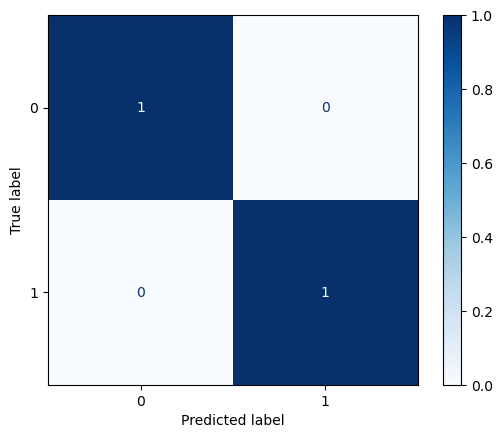

In [134]:
# Tuned Train Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_train, rf_train_preds2, cmap='Blues', normalize='true');

In [135]:
# Tuned Test CR
print(classification_report(y_test, rf_test_preds2))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       395
           1       0.85      0.79      0.82       206

    accuracy                           0.88       601
   macro avg       0.87      0.86      0.86       601
weighted avg       0.88      0.88      0.88       601



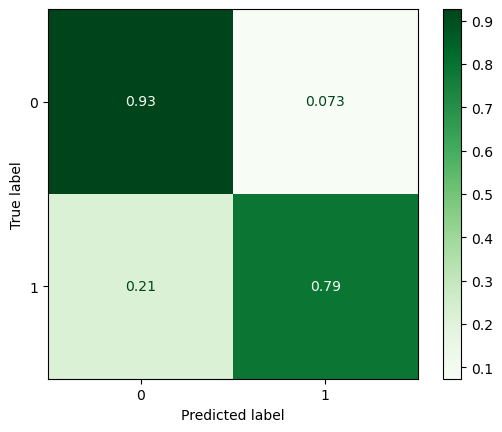

In [136]:
# Tuned Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds2, 
                                        cmap='Greens', normalize='true');

* Tuning unfortunately did not improve scores. False negatives really need to be lower as this is medical related data. 

## XGBoost Classifier

In [90]:
xgb = XGBClassifier()
xgb_pipe = make_pipeline(preprocessor, xgb)
xgb_pipe.fit(X_train, y_train)

[16:32:00] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_eek2t0c4ro/croots/recipe/xgboost-split_1659548960591/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Is_Female', 'Is_White',
                                                   'WaistCirc', 'BMI',
                                                   'UrAlbCr', 'UricAcid',
                                                   'BloodGlucose', 'HDL',
                                                   'Triglycerides', 'Is_Old']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   Simp...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [91]:
# Saving train and test predictions
xgb_train_preds = xgb_pipe.predict(X_train)
xgb_test_preds = xgb_pipe.predict(X_test)


**Initial XGBoost**

In [92]:
print(classification_report(y_train, xgb_train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1184
           1       1.00      1.00      1.00       616

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



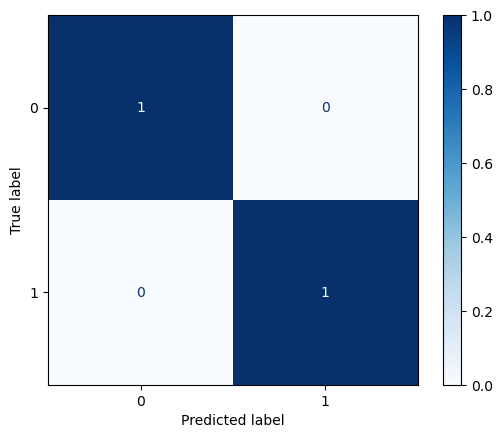

In [93]:
ConfusionMatrixDisplay.from_predictions(y_train, xgb_train_preds, cmap='Blues', normalize='true');

In [94]:
print(classification_report(y_test, xgb_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       395
           1       0.84      0.79      0.81       206

    accuracy                           0.88       601
   macro avg       0.87      0.86      0.86       601
weighted avg       0.88      0.88      0.88       601



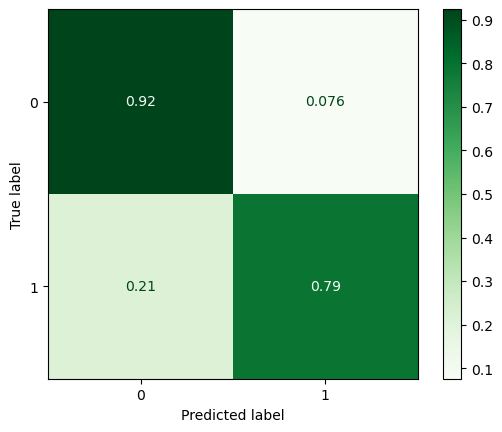

In [95]:
# Tuned Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_test_preds, 
                                        cmap='Greens', normalize='true');

* Very similar scores to the RF Classifier.
* Overfitting as well. 

In [96]:
xgb_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['Is_Female', 'Is_White', 'WaistCirc', 'BMI',
                                     'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
                                     'Triglycerides', 'Is_Old']),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
      

In [ ]:
param_grid = {
    "xgbclassifier__max_depth": range(1,21),
    "xgbclassifier__learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "xgbclassifier__gamma": [0, 0.25, 1],
    "xgbclassifier__reg_lambda": [0, 1, 10],
    "xgbclassifier__scale_pos_weight": [1, 3, 5],
    "xgbclassifier__subsample": [0.8, 1]}


In [ ]:
# Using GridSearch, fittinng to train
xgb_grid = GridSearchCV(xgb_pipe, param_grid)
xgb_grid.fit(X_train, y_train)

In [ ]:
print(xgb_grid.best_params_)

In [ ]:
xgb_grid.best_score_

In [ ]:
grid_df = pd.DataFrame(xgb_grid.cv_results_)

grid_df 

In [ ]:
parameters = ['param_xgbclassifier__max_depth', 'param_xgbclassifier__learning_rate', 
              'param_xgbclassifier__gamma', 'param_xgbclassifier__reg_lambda', 
              'param_xgbclassifier__scale_pos_weight', 'param_xgbclassifier__subsample', 
              'mean_test_score', 'rank_test_score']
grid_df[parameters]

In [ ]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

In [ ]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(20)

best.head()

**XGB Tuned**

In [ ]:
xgb2 = XGBClassifier(max_depth ='6', learning_rate = '0.2', gamma = '1', 
                    reg_lambda = '0', scale_pos_weight = '1', subsample = '0.8')

xgb_pipe2 = make_pipeline(preprocessor, xgb2)
xgb_pipe2.fit(X_train, y_train)

In [ ]:
# Save Predictions
xgb_train_preds2 = xgb_pipe2.predict(X_train)

# Save test predictions
xgb_test_preds2 = xgb_pipe2.predict(X_test)

In [ ]:
print(classification_report(y_train, xgb_train_preds2))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, xgb_train_preds2, cmap='Blues', normalize='true');

In [ ]:
print(classification_report(y_test, xgb_test_preds2))

In [ ]:
# Tuned Test Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, xgb_test_preds2, 
                                        cmap='Greens', normalize='true');

* Slight Improvement in false negatives being reduced. Still needs to be lower because it's medical/diagnostic data. 
* Better than Random Forest though. 

## SMOTE

In [ ]:
smote = SMOTE()
sm_pipe = smote_pipe(preprocessor, smote)

In [ ]:
## Display the value counts for y_train_smote
print(y_train.value_counts())
_, y_train_smote = sm_pipe.fit_resample(X_train, y_train)
print(y_train_smote.value_counts())

In [ ]:
rf_smote = RandomForestClassifier(random_state=42)

rf_smote = smote_pipe(preprocessor, smote, rf_smote)

rf_smote.fit(X_train, y_train)


In [ ]:
# Save Predictions
smote_train_preds2 = rf_smote.predict(X_train)

# Save test predictions
smote_test_preds2 = rf_smote.predict(X_test)

In [ ]:
print(classification_report(y_train, smote_train_preds2))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, smote_train_preds2, 
                                        cmap='Blues', normalize='true')

In [ ]:
print(classification_report(y_test, smote_test_preds2))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, smote_test_preds2, 
                                        cmap='Greens', normalize='true');

* Definite improvement in false negatives. The percentage is still too high to be a great model for this dataset. It wouldn't be considered acceptable to misdiagnose 14% of patients as not having Metabolic Syndrome when they do. 